In [1]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(42)

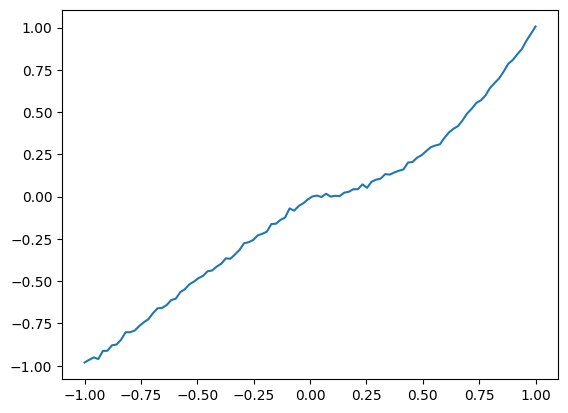

In [2]:
x = torch.linspace(-1, 1, 100)
y = torch.where(x > 0, x**2, x) + torch.randn((100, )) * 0.01

plt.plot(x, y)

In [ ]:
class NN(torch.nn.Module):
    def __init__(self, hidden_size=2, activation=torch.nn.functional.relu, input_size=1):
        super().__init__()

        self.W = torch.nn.Linear(input_size + 1, hidden_size, bias=False)
        self.u = torch.nn.Linear(hidden_size + 1, 1, bias=False)

        self.activation = activation

    def forward(self, x):
        x = torch.cat((torch.tensor([1]), x)).reshape(2, 1)
        h = self.W.weight @ x
        h = self.activation(h)
        h = torch.cat((torch.tensor([[1]]), h))

        y = self.u.weight @ h

        return y

    def __str__(self):
        total = "W =              u =\n"
        W_list = [[f"{x:.2f}" for x in y] for y in self.W.weight.data.tolist()]
        U_list = [[f"{x:.2f}" for x in y] for y in self.u.weight.data.tolist()][0]

        for w_row, u_row in zip(
            W_list + [" " * (len(" ".join(W_list[0])) // 2 + 1)], U_list, strict=True
        ):
            total += "   " + " ".join(w_row) + "    " + u_row + "\n"
        total += "\n"
        return total

    def __add__(self, other):
        if not isinstance(other, NN):
            return NotImplemented

        new = NN()
        new.W.weight = torch.nn.Parameter((self.W.weight + other.W.weight) / 2)
        new.u.weight = torch.nn.Parameter((self.u.weight + other.u.weight) / 2)
        return new

    def __iadd__(self, other):
        if not isinstance(other, NN):
            return NotImplemented
        self.W.weight = torch.nn.Parameter((self.W.weight + other.W.weight) / 2)
        self.u.weight = torch.nn.Parameter((self.u.weight + other.u.weight) / 2)
        return self

In [4]:
net1 = NN()
net2 = NN()

net1.W.weight = torch.nn.Parameter(torch.tensor([[1.0, 3.0], [2.0, 4.0]]))
net1.u.weight = torch.nn.Parameter(torch.tensor([[1.0, 2.0, 3.0]]))

net2.W.weight = torch.nn.Parameter(torch.tensor([[-1.0, 0.0], [1.0, 4.0]]))
net2.u.weight = torch.nn.Parameter(torch.tensor([[0.0, -1.0, 2.0]]))

net1.W.weight = torch.nn.Parameter(torch.randn(2, 2))
net1.u.weight = torch.nn.Parameter(torch.randn(1, 3) )

net2.W.weight = torch.nn.Parameter(torch.randn(2, 2))
net2.u.weight = torch.nn.Parameter(torch.randn(1, 3))

print("Network 1:")
print(net1)
print("Network 2:")
print(net2)




opt1 = torch.optim.SGD(net1.parameters(), lr=0.01)
opt2 = torch.optim.SGD(net2.parameters(), lr=0.01)

loss_fn = torch.nn.MSELoss()




for e in range(100):

    opt1.zero_grad()
    opt2.zero_grad()

    x = torch.tensor([5.0])
    y = torch.tensor([[3.0]])
    loss1 = loss_fn(net1(x), y)
    loss2 = loss_fn(net2(x), y)

    loss1.backward()
    loss2.backward()
    opt1.step()
    opt2.step()

print("After Update: ")
print("Network 1:")
print(net1)
print("Network 2:")
print(net2)

print("Network Combined:")
print(net1 + net2)

print("n1(x): ", net1(x))
print("n2(x): ", net2(x))
print("(n1 + n2)(x): ", (net1 + net2)(x))

net1.W.weight = torch.nn.Parameter(torch.tensor([[1.0, 3.0], [2.0, 4.0]]))
net1.u.weight = torch.nn.Parameter(torch.tensor([[1.0, 2.0, 3.0]]))

net2.W.weight = torch.nn.Parameter(torch.tensor([[-1.0, 0.0], [1.0, 4.0]]))
net2.u.weight = torch.nn.Parameter(torch.tensor([[0.0, -1.0, 2.0]]))


net1.W.weight = torch.nn.Parameter(torch.randn(2, 2))
net1.u.weight = torch.nn.Parameter(torch.randn(1, 3) )

net2.W.weight = torch.nn.Parameter(torch.randn(2, 2))
net2.u.weight = torch.nn.Parameter(torch.randn(1, 3))

for e in range(100):
    if e%100 == 0 and e > 1:
        other = NN()
        other.load_state_dict(net1.state_dict())
        net1 += net2
        net2 += other
        print(e, ": ")
        print(other)


    opt1.zero_grad()
    opt2.zero_grad()

    x = torch.tensor([5.0])
    y = torch.tensor([[3.0]])
    loss1 = loss_fn(net1(x), y)
    loss2 = loss_fn(net2(x), y)

    loss1.backward()
    loss2.backward()
    opt1.step()
    opt2.step()


print("After FedAVG: ")
print("Network 1:")
print(net1)
print("Network 2:")
print(net2)

print("n1(x): ", net1(x))
print("n2(x): ", net2(x))
print("(n1 + n2)(x): ", (net1 + net2)(x))

Network 1:
W =              u =
   -1.29 0.49    0.79
   1.22 -0.89    1.01
                  0.84


Network 2:
W =              u =
   -0.16 1.32    0.05
   0.57 1.28    -0.34
                  -0.43


After Update: 
Network 1:
W =              u =
   -1.25 0.66    0.82
   1.22 -0.89    1.05
                  0.84


Network 2:
W =              u =
   -0.27 0.79    0.16
   0.45 0.68    0.38
                  0.37


Network Combined:
W =              u =
   -0.76 0.73    0.49
   0.83 -0.11    0.72
                  0.61


n1(x):  tensor([[3.0000]], grad_fn=<MmBackward0>)
n2(x):  tensor([[3.]], grad_fn=<MmBackward0>)
(n1 + n2)(x):  tensor([[2.7290]], grad_fn=<MmBackward0>)
After FedAVG: 
Network 1:
W =              u =
   0.17 1.58    1.45
   0.45 0.03    -0.69
                1.00


Network 2:
W =              u =
   0.61 0.78    -0.48
   -0.30 -1.28    2.38
                0.92


n1(x):  tensor([[-3.5384]], grad_fn=<MmBackward0>)
n2(x):  tensor([[10.2401]], grad_fn=<MmBackward0>)
(n1 +